<a href="https://colab.research.google.com/github/IsabellaHope-006/InteligenciaArtificial_SIHP/blob/main/PRUEBA_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

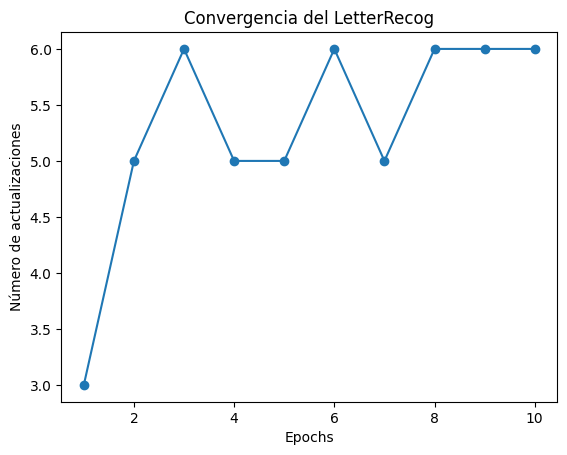

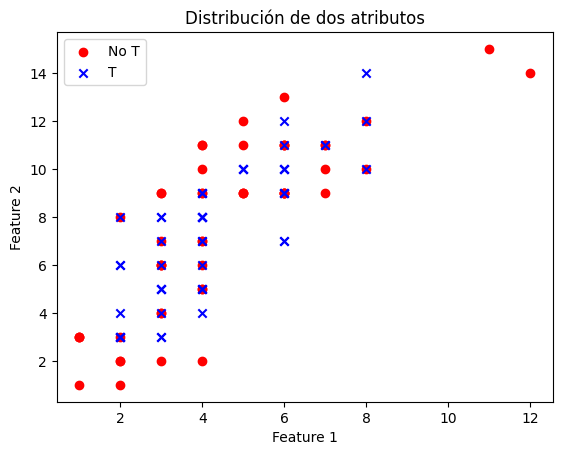

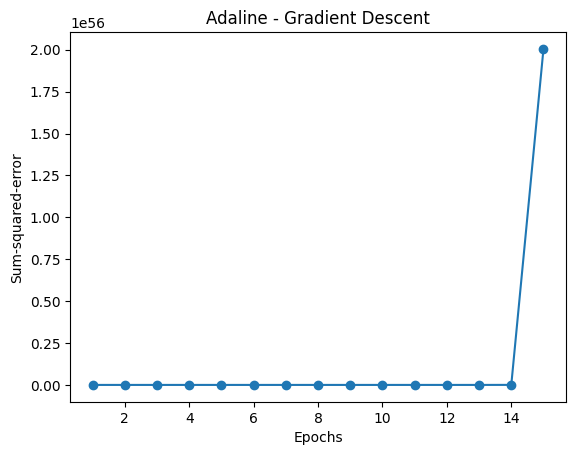

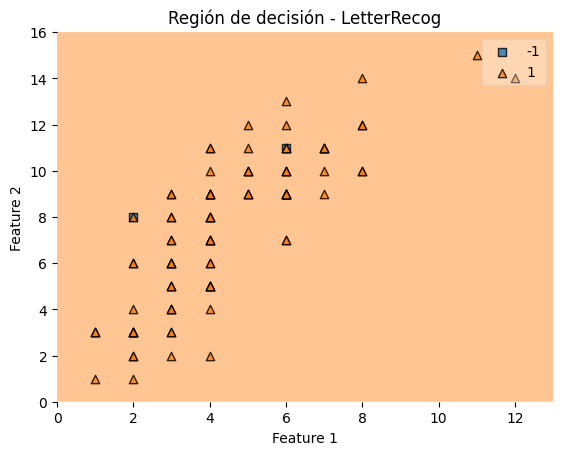

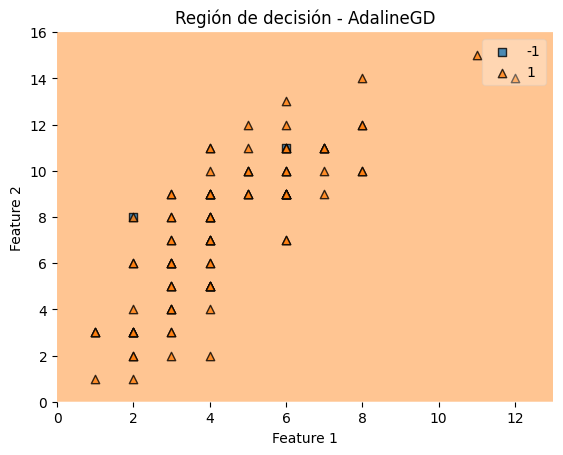

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions  # Importar función para las regiones de decisión

# Definición del modelo LetterRecog
class LetterRecog(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                error += int(update != 0.0)
            self.cost_.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Definición del modelo AdalineGD
class AdalineGD(object):
    """ADAptive LInear NEuron classifier."""

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Cargar el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data', header=None)

# Seleccionar las características (columnas 1 a 16)
X = df.iloc[0:100, 1:3].values  # Usar solo dos características para graficar
X = X.astype(np.float64)

# Crear variable objetivo y (columna 0)
y = df.iloc[0:100, 0].values
y = np.where(y == 'T', -1, 1)  # Etiquetamos 'T' como -1 y el resto como 1

# Entrenar el modelo LetterRecog
ppn = LetterRecog(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Graficar el costo del modelo LetterRecog
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')
plt.title('Convergencia del LetterRecog')
plt.show()

# Representación gráfica de dos atributos del dataset
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='No T')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='T')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Distribución de dos atributos')
plt.show()

# Entrenar el modelo AdalineGD
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X, y)

# Graficar el costo del modelo AdalineGD
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Gradient Descent')
plt.show()

# Graficar las regiones de decisión para LetterRecog
plot_decision_regions(X, y, clf=ppn)
plt.title('Región de decisión - LetterRecog')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Graficar las regiones de decisión para AdalineGD
plot_decision_regions(X, y, clf=ada)
plt.title('Región de decisión - AdalineGD')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

